<a href="https://colab.research.google.com/github/Itsuki-Hamano123/auto_ml/blob/master/experiments/img_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
%pip install --upgrade mxnet-cu101
%pip install autogluon

Requirement already up-to-date: mxnet-cu101 in /usr/local/lib/python3.6/dist-packages (1.6.0)


In [ ]:
import numpy as np

import autogluon as ag
from autogluon import ImageClassification as task

## データセット読み込み

In [ ]:
%%time
DATASET_NAME = 'FashionMNIST' #@param{type:'string'}
train_ds = task.Dataset(name=DATASET_NAME, train=True)
test_ds = task.Dataset(name=DATASET_NAME, train=False)

CPU times: user 57 µs, sys: 10 µs, total: 67 µs
Wall time: 72.7 µs


Auto suggesting network net for dataset AutoGluonObject
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/263/1' processes=1 threads=2, memory=13.65 GB>, Resource: NodeResourceManager(2 CPUs, 1 GPUs))
})



get_built_in_dataset FashionMNIST


{'dataset': <mxnet.gluon.data.vision.datasets.FashionMNIST object at 0x7fde280e5f98>, 'net': Sequential(
  (0): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(1 -> 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (conv2): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (shortcut): Conv2D(1 -> 8, kernel_size=(1, 1), stride=(2, 2))
  )
  (1): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (conv2): ConvBNReLU(
      (co

get_built_in_dataset FashionMNIST
{'dataset': <mxnet.gluon.data.vision.datasets.FashionMNIST object at 0x7fde2752aa90>, 'net': Sequential(
  (0): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(1 -> 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (conv2): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (shortcut): Conv2D(1 -> 8, kernel_size=(1, 1), stride=(2, 2))
  )
  (1): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )


get_built_in_dataset FashionMNIST
{'dataset': <mxnet.gluon.data.vision.datasets.FashionMNIST object at 0x7fde2752f080>, 'net': Sequential(
  (0): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(1 -> 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (conv2): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )
    (shortcut): Conv2D(1 -> 8, kernel_size=(1, 1), stride=(2, 2))
  )
  (1): ResUnit(
    (conv1): ConvBNReLU(
      (conv): Conv2D(8 -> 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (bn): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=8)
      (relu): Activation(relu)
    )


Saving Training Curve in checkpoint/plot_training_curves.png


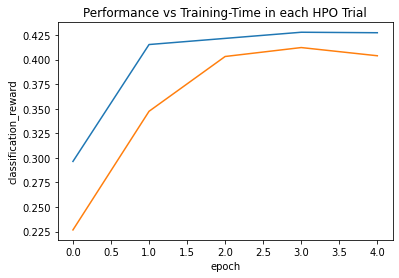

get_built_in_dataset FashionMNIST


In [ ]:
time_limits=30
classifier = task.fit(train_ds,
                      num_trials=2,
                      #time_limits=time_limits,
                      epochs=5,
                      ngpus_per_trial=1,
                      verbose=True)